<a href="https://colab.research.google.com/github/reifeitan/Hello_World/blob/master-branch/Insurance/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Insurance dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set()




df = pd.read_csv('insurance.csv')

In [2]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


Checking for Null values

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Thing can be faster if we categorize some of the fields.

In [5]:
df = df.astype({'sex': 'category', 'smoker': 'category', 'region': 'category'})
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

Checking for numeric pairwise correlation. <br>
Nothing significant

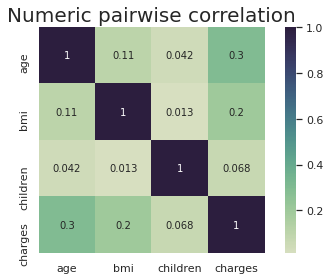

In [6]:
corr = df.corr()
sns.heatmap(
    corr,
    cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True),
    annot=True,
    square=True)
plt.title("Numeric pairwise correlation", size=20)
plt.tight_layout()
plt.show()

Let's see some distributions

No handles with labels found to put in legend.


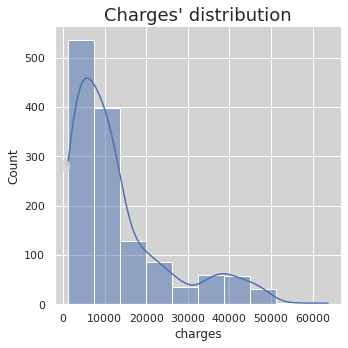

In [8]:
sns.set(rc={'axes.facecolor':'lightgrey'})
sns.displot(df, x='charges', bins=10, kde=True, multiple='dodge')
plt.title("Charges' distribution", size=18)
plt.subplots_adjust(top=.91)
plt.legend(loc='center left')
plt.tight_layout()
plt.show()

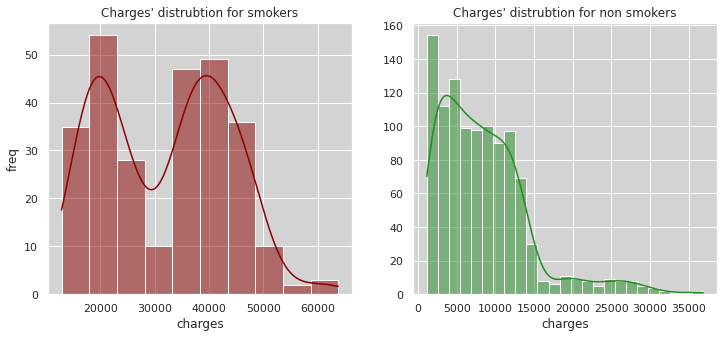

In [9]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
sns.histplot(df[df.smoker == 'yes']['charges'], color='darkred', ax=ax, kde=True)
ax.set_title("Charges' distrubtion for smokers")
ax.set_ylabel('freq')

ax = f.add_subplot(122)
sns.histplot(df, x=df[df.smoker== 'no']['charges'], color='forestgreen', ax=ax, kde=True)
ax.set_title("Charges' distrubtion for non smokers")
ax.set_ylabel('')

plt.show()

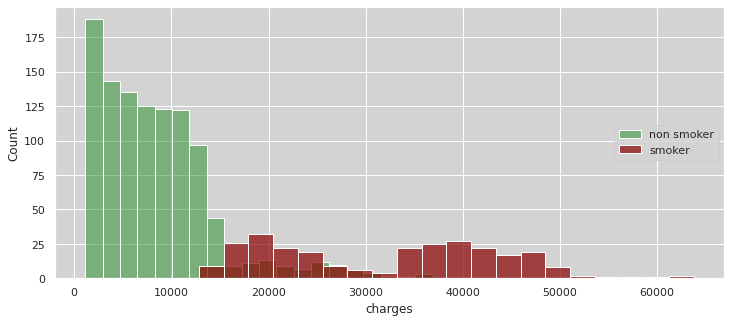

In [10]:
plt.figure(figsize=(12,5))
sns.histplot(df[df.smoker=='no']['charges'], bins=20, alpha=0.5, label='non smoker', color='forestgreen')
sns.histplot(df[df.smoker=='yes']['charges'], bins=20, alpha=0.7, label='smoker', color='darkred')
plt.legend(loc='center right')
plt.show()

Smokers - be aware.

Split between smokers and non smokers

In [11]:
df['smoker'].value_counts()/df['smoker'].count()

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

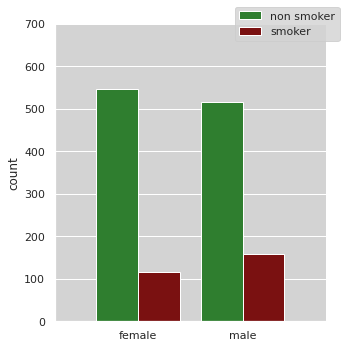

In [12]:
color=['forestgreen', 'darkred']

labels = ['female', 'male']
g = sns.catplot(x='sex', kind='count', hue='smoker', data=df, palette=color,legend=False).set_xticklabels(labels).set_xlabels("")

a = plt.legend(bbox_to_anchor=(1.05, 1), loc=7, borderaxespad=0.)
a.get_texts()[0].set_text('non smoker')
a.get_texts()[1].set_text('smoker')
g.set(ylim=(0,700),xlim=(-.8,1.8))
plt.tight_layout()
plt.show()

It's intersting to see that for non smoker the median is about the same as for non smoker,<br>
however for male smokers median is much higher than women, all while the IQR is pretty much the same.

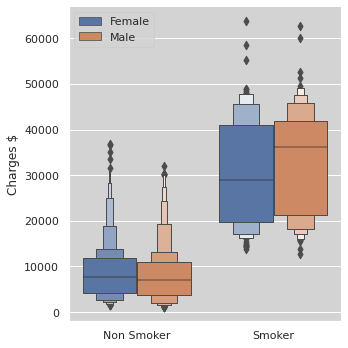

In [13]:
sns.catplot(x='smoker', y='charges', hue='sex', data=df, kind='boxen',
            legend=False).set_xticklabels(['Non Smoker', 'Smoker']).set_xlabels("").set_ylabels("Charges $")
a = plt.legend()
a.get_texts()[0].set_text('Female')
a.get_texts()[1].set_text('Male')
plt.tight_layout()
plt.show()

In [14]:
df.groupby(['sex', 'smoker']).charges.mean()

sex     smoker
female  no         8762.297300
        yes       30678.996276
male    no         8087.204731
        yes       33042.005975
Name: charges, dtype: float64

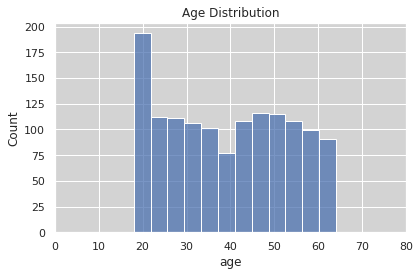

In [17]:
plt.title('Age Distribution')
c = sns.histplot(data=df['age'])
c.set_xlim([0,80])
plt.tight_layout()
plt.show()

Even at such a young age the difference is huge (Yes the data is bogus, I know)

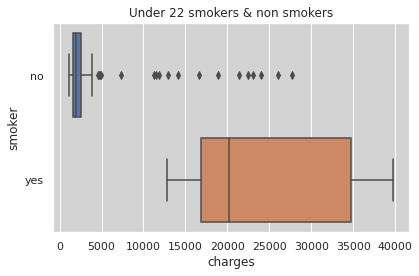

In [20]:
sns.boxplot(data=df[df['age']<22],x='charges', y='smoker', orient='h')
plt.title('Under 22 smokers & non smokers')
plt.tight_layout()
plt.show()

BMI can be a predictor for your insurance cost?

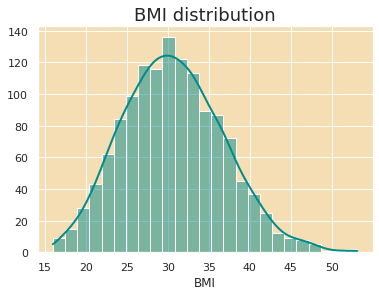

In [21]:
sns.set(rc={'axes.facecolor':'wheat'})
sns.histplot(data=df, x='bmi', kde=True, color='darkcyan',line_kws={"lw": 2}).set(ylabel="", xlabel="BMI")
plt.title('BMI distribution', size=18)
plt.subplots_adjust(top=.91)

BMI is not a strong predictor in comparison to smoking...<br>
Though these things together are greating in raising your insurance cost.

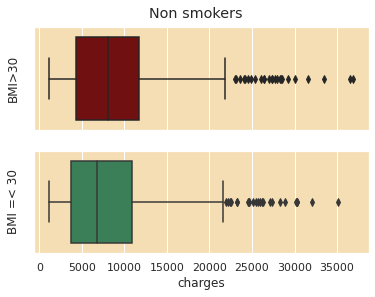

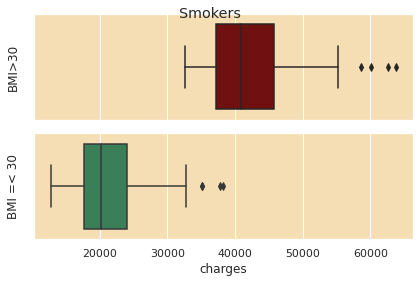

In [22]:
fig, ax = plt.subplots(nrows=2, sharex=True)
sns.boxplot(data=df[(df['bmi']>30) & (df['smoker']=='no')], x='charges', ax=ax[0],color='maroon').set(xlabel="", ylabel="BMI>30")
sns.boxplot(data=df[(df['bmi']<=30) & (df['smoker']=='no')], x='charges', ax=ax[1], color='seagreen').set(ylabel='BMI =< 30')
plt.subplots_adjust(top=.91)
plt.suptitle("Non smokers")
fig, ax = plt.subplots(nrows=2, sharex=True)
sns.boxplot(data=df[(df['bmi']>30) & (df['smoker']=='yes')], x='charges', ax=ax[0],color='maroon').set(xlabel="", ylabel="BMI>30")
sns.boxplot(data=df[(df['bmi']<=30) & (df['smoker']=='yes')], x='charges', ax=ax[1], color='seagreen').set(ylabel='BMI =< 30')
plt.subplots_adjust(top=.91)
plt.suptitle("Smokers")
plt.tight_layout()
plt.show()

Note the slopes for males and females are pretty much the same.

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


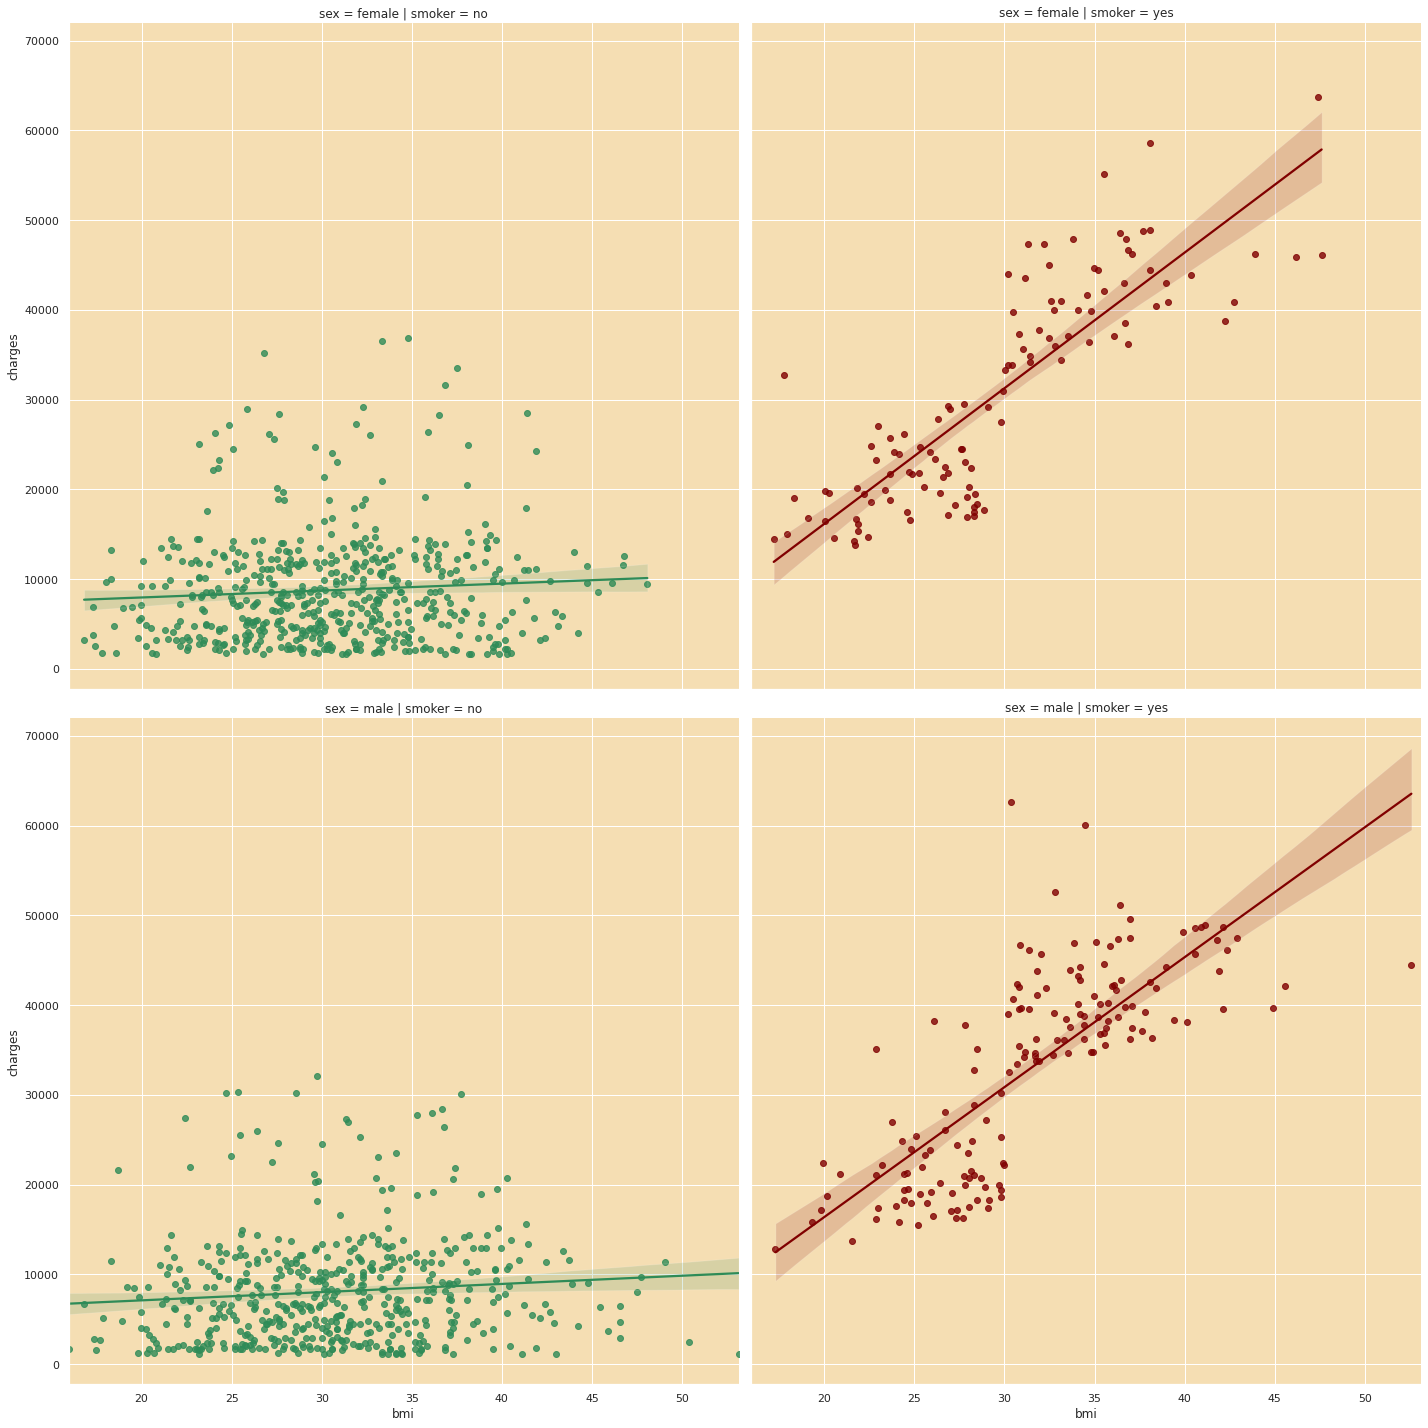

In [23]:
color=['seagreen', 'maroon']
sns.lmplot(data=df, x='bmi', y='charges',row='sex' ,col='smoker',hue='smoker', palette=color, size=10)
plt.tight_layout()
plt.show()

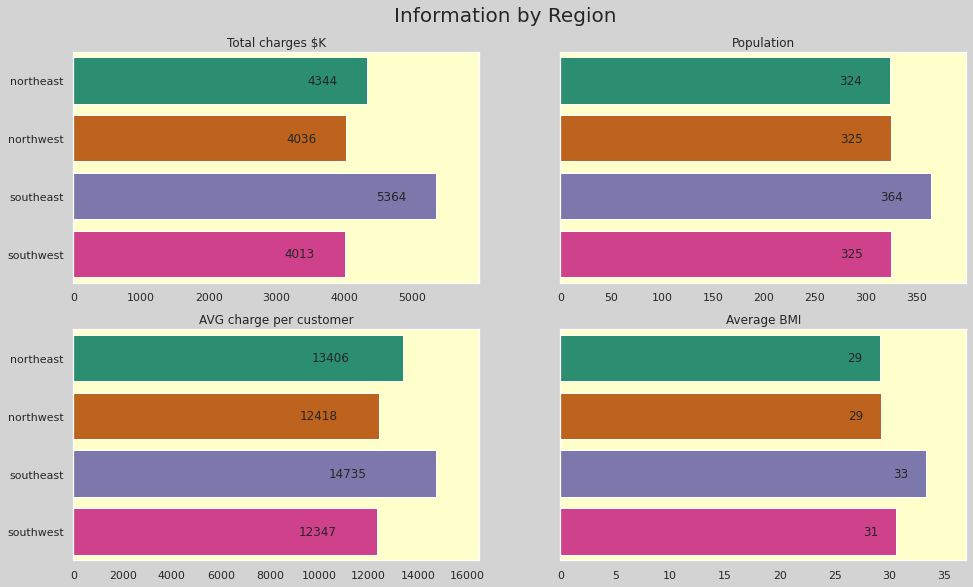

In [32]:
kk = pd.DataFrame(df.groupby('region').agg({'charges': 'sum', 'children': 'count', 'bmi': 'mean'}))


sns.set(rc={'axes.facecolor':'xkcd:ecru', 'figure.facecolor':'lightgray'})
fig = plt.figure(figsize=(16,9))
plt.subplots_adjust(top=.91)
plt.suptitle("Information by Region", size=20)
# fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2,2,1)
ax.grid(False)
sns.barplot(data=kk, y=kk.index, x=kk['charges']/1000, orient='h', ci=None, ax=ax, palette='Dark2').set(ylabel="", xlabel='')
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = (width-890), # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
ax.set(xlim=(0,5999))
plt.title("Total charges $K")
ax = fig.add_subplot(2,2,2)
ax.grid(False)
sns.barplot(data=kk, y=kk.index, x=kk['children'], orient='h', ci=None, ax=ax, palette='Dark2').set(yticklabels="", ylabel="", xlabel="")
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = (width-50), # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
ax.set(xlim=(0,399))
plt.title("Population")
ax = fig.add_subplot(2,2,4)
ax.grid(False)
sns.barplot(data=kk, y=kk.index, x=kk['bmi'], orient='h', ci=None, ax=ax,palette='Dark2').set(yticklabels="", ylabel="", xlabel="")
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = (width-3), # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
ax.set(xlim=(0,37))
plt.title("Average BMI")
ax = fig.add_subplot(2,2,3)
ax.grid(False)
sns.barplot(data=kk, y=kk.index, x=kk['charges']/kk['children'], orient='h', ci=None, ax=ax, palette='Dark2').set(ylabel="", xlabel='')
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    ax.text(x = (width/2)+3000, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center
ax.set(xlim=(0,16500))
plt.title("AVG charge per customer")
plt.tight_layout
plt.show()

Not surprising when we know what smoking makes to your insurance cost.

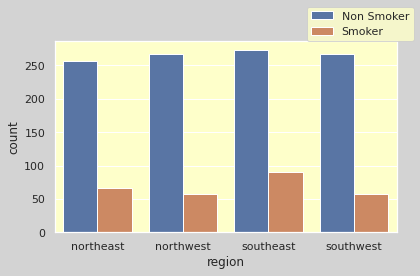

In [45]:
sns.countplot(data=df, x='region', hue='smoker')
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.)
l.get_texts()[1].set_text('Smoker')
l.get_texts()[0].set_text('Non Smoker')
plt.tight_layout()
plt.show()